<h1 align="center">📚 BatiGhor Publication Book Sales Analysis Project</h1>

---

## 📈 Project Overview

Welcome to the analysis of book sales data from **Rokomari**, a leading online bookshop in Bangladesh. This Jupyter notebook provides a detailed examination of **BatiGhor Publication's** performance on the Rokomari platform, focusing on 342 titles. Our analysis delves into various aspects such as:

- 📊 Pricing strategies
- ✍️ Author metrics
- ⭐ Ratings
- 📚 Category performance

---

## 🗃️ Data Collection

The dataset for this project was meticulously scraped from the Rokomari online bookshop, concentrating exclusively on books published by **BatiGhor**. This approach allows us to uncover valuable insights into the performance and characteristics of a single publisher's catalog within a significant online retail environment.

---

## 🧰 Methodology

To achieve our objectives, we will employ various data analysis techniques, including:

- 📉 Descriptive statistics
- 📊 Data visualization
- 🔗 Correlation analysis
- 🔬 Hypothesis testing

---

Let's begin by importing the necessary libraries and loading our **BatiGhor publication dataset** from Rokomari.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import pearsonr
from scipy import stats
from scipy.stats import norm
from plotly.offline import iplot
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

## Let's Import our dataset

In [3]:
df = pd.read_csv('batighor_books_data_cleaned.csv')

In [4]:
df.head()

,Title,Author,Total Ratings,Original Price,Discounted Price,Category,Number of Reviews
0,কসমোজাহি,মোহাম্মদ নাজিম উদ্দিন,9.0,380.0,298.0,থ্রিলার,5
1,কন্ট্রোল,মোহাম্মদ নাজিম উদ্দিন,11.0,650.0,510.0,রহস্য ও গোয়েন্দা,7
2,ম্যালিস,কেইগো হিগাশিনো,3.0,400.0,314.0,"রহস্য, গোয়েন্দা, ভৌতিক, মিথ, থ্রিলার, ও অ্যাডভ...",4
3,উজিরে আজম,হাসান ইনাম,5.0,220.0,172.0,থ্রিলার,1
4,মৃত কৈটভ,সৌরভ চক্রবর্তী,NaN,350.0,274.0,অতিপ্রাকৃত ও ভৌতিক,NaN


In [5]:
df['Number of Reviews'] = df['Number of Reviews'].replace('No', np.nan)

## Do some feature extraction's

In [6]:
df['Number of Reviews'] = pd.to_numeric(df['Number of Reviews'], errors='coerce')

df['Discount Percentage'] = (df['Original Price'] - df['Discounted Price']) / df['Original Price'] * 100

# 1. Author Popularity
author_popularity = df.groupby('Author')['Total Ratings'].sum() / df.groupby('Author')['Title'].count()
df['Author Popularity'] = df['Author'].map(author_popularity)

# 2. Category Popularity Index
category_popularity_index = df.groupby('Category')['Total Ratings'].sum() / df.groupby('Category')['Title'].count()
df['Category Popularity Index'] = df['Category'].map(category_popularity_index)

# 3. Discount Effectiveness
df['Discount Effectiveness'] = df['Total Ratings'] / (df['Discount Percentage'] + 1)

# 4. Author Book Count
author_book_count = df['Author'].value_counts()
df['Author Book Count'] = df['Author'].map(author_book_count)

In [7]:
# Reorder the DataFrame columns
df = df[[
    'Title', 'Author', 'Category', 'Original Price', 'Discounted Price', 
    'Discount Percentage', 'Total Ratings', 'Number of Reviews', 
    'Author Popularity', 'Author Book Count', 'Category Popularity Index', 
    'Discount Effectiveness'
]]

In [8]:
df.head()

,Title,Author,Category,Original Price,Discounted Price,Discount Percentage,Total Ratings,Number of Reviews,Author Popularity,Author Book Count,Category Popularity Index,Discount Effectiveness
0,কসমোজাহি,মোহাম্মদ নাজিম উদ্দিন,থ্রিলার,380.0,298.0,21.578947,9.0,5.0,48.133333,45,28.109091,0.398601
1,কন্ট্রোল,মোহাম্মদ নাজিম উদ্দিন,রহস্য ও গোয়েন্দা,650.0,510.0,21.538462,11.0,7.0,48.133333,45,25.642857,0.488055
2,ম্যালিস,কেইগো হিগাশিনো,"রহস্য, গোয়েন্দা, ভৌতিক, মিথ, থ্রিলার, ও অ্যাডভ...",400.0,314.0,21.500000,3.0,4.0,18.000000,2,34.459459,0.133333
3,উজিরে আজম,হাসান ইনাম,থ্রিলার,220.0,172.0,21.818182,5.0,1.0,12.000000,4,28.109091,0.219124
4,মৃত কৈটভ,সৌরভ চক্রবর্তী,অতিপ্রাকৃত ও ভৌতিক,350.0,274.0,21.714286,NaN,NaN,14.200000,5,8.454545,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      342 non-null    object 
 1   Author                     342 non-null    object 
 2   Category                   342 non-null    object 
 3   Original Price             342 non-null    float64
 4   Discounted Price           342 non-null    float64
 5   Discount Percentage        342 non-null    float64
 6   Total Ratings              298 non-null    float64
 7   Number of Reviews          284 non-null    float64
 8   Author Popularity          342 non-null    float64
 9   Author Book Count          342 non-null    int64  
 10  Category Popularity Index  342 non-null    float64
 11  Discount Effectiveness     298 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 32.2+ KB


In [10]:
df.describe()

,Original Price,Discounted Price,Discount Percentage,Total Ratings,Number of Reviews,Author Popularity,Author Book Count,Category Popularity Index,Discount Effectiveness
count,342.000000,342.000000,342.000000,298.000000,284.000000,342.000000,342.000000,342.000000,298.000000
mean,347.865497,265.754386,23.893641,24.090604,20.549296,20.991228,9.631579,20.991228,1.038908
std,321.840117,241.536391,3.745746,52.584149,63.312180,33.011172,14.176059,11.970246,2.323321
min,60.000000,42.000000,21.071429,1.000000,1.000000,0.000000,1.000000,0.000000,0.030977
25%,200.000000,157.000000,21.538462,4.250000,2.000000,5.000000,2.000000,8.689655,0.164792
50%,280.000000,210.000000,21.666667,9.000000,5.000000,9.583333,4.000000,28.109091,0.354526
75%,400.000000,314.000000,30.000000,18.000000,13.000000,20.333333,9.000000,28.109091,0.800785
max,3850.000000,3010.000000,40.000000,487.000000,658.000000,202.800000,45.000000,45.500000,21.548673


## Check and Impute missing values

In [11]:
df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100
print(null_percentages)

Title                         0.000000
Author                        0.000000
Category                      0.000000
Original Price                0.000000
Discounted Price              0.000000
Discount Percentage           0.000000
Total Ratings                12.865497
Number of Reviews            16.959064
Author Popularity             0.000000
Author Book Count             0.000000
Category Popularity Index     0.000000
Discount Effectiveness       12.865497
dtype: float64


In [12]:
df['Total Ratings'] = df.groupby('Category')['Total Ratings'].transform(lambda x: x.fillna(x.mean()))

In [13]:
feature = ['Number of Reviews']

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
df[feature] = imputer.fit_transform(df[feature])

In [14]:
imputer = SimpleImputer(strategy='mean')
df['Discount Effectiveness'] = imputer.fit_transform(df[['Discount Effectiveness']])

In [15]:
df.isnull().sum()

Title                        0
Author                       0
Category                     0
Original Price               0
Discounted Price             0
Discount Percentage          0
Total Ratings                5
Number of Reviews            0
Author Popularity            0
Author Book Count            0
Category Popularity Index    0
Discount Effectiveness       0
dtype: int64

In [16]:
df.dropna(axis=0, inplace=True)

In [17]:
df.isnull().sum()

Title                        0
Author                       0
Category                     0
Original Price               0
Discounted Price             0
Discount Percentage          0
Total Ratings                0
Number of Reviews            0
Author Popularity            0
Author Book Count            0
Category Popularity Index    0
Discount Effectiveness       0
dtype: int64

In [18]:
df.shape

(337, 12)

# Start Our Analysis

<h4 align="center"> Top Rated book</h4>

In [19]:
# Top Rated book
top_rated_book = df.loc[df['Total Ratings'].idxmax(), 'Title']
print(top_rated_book)

রবীন্দ্রনাথ এখানে কখনও - খেতে আসেননি


<h4 align="center"> Top Reviewed book</h4>

In [20]:
# Top Reviewed book
top_reviewed_book = df.loc[df['Number of Reviews'].idxmax(), 'Title']
print(top_reviewed_book)

নিক পিরোগ থ্রি এ এম সিরিজ


<h4 align="center"> Which book categories have the highest and lowest average ratings?</h4>

In [21]:
# Which book categories have the highest and lowest average ratings?
category_avg_ratings = df.groupby('Category')['Total Ratings'].mean().sort_values(ascending=False)
highest_avg_ratings_category = category_avg_ratings.idxmax()
lowest_avg_ratings_category = category_avg_ratings.idxmin()

# Distribution of books across different categories
category_counts = df['Category'].value_counts()

# Analysis of discounts across categories
category_discount_stats = df.groupby('Category')['Discount Percentage'].describe()

In [22]:
highest_avg_ratings_category

'রহস্য,গোয়েন্দা,ভৌতিক ও থ্রিলার কালেকশন'

In [23]:
lowest_avg_ratings_category

'বাংলা কবিতা'

In [24]:
print(category_counts)

Category
থ্রিলার                                                                  110
রহস্য, গোয়েন্দা, ভৌতিক, মিথ, থ্রিলার, ও অ্যাডভেঞ্চার: অনুবাদ ও ইংরেজি     74
সমকালীন উপন্যাস                                                           29
অনুবাদ উপন্যাস                                                            16
রহস্য ও গোয়েন্দা                                                          14
থ্রিলার ও অ্যাডভেঞ্চার উপন্যাস                                            14
সায়েন্স ফিকশন                                                             13
অতিপ্রাকৃত ও ভৌতিক                                                        11
বাংলা কবিতা                                                                9
শিশু-কিশোর: রহস্য, গোয়েন্দা, ভৌতিক, থ্রিলার ও অ্যাডভেঞ্চার                 6
রহস্য,গোয়েন্দা,ভৌতিক ও থ্রিলার কালেকশন                                     5
প্যারাসাইকোলজিকাল উপন্যাস                                                  4
অনুবাদ সায়েন্স ফিকশন                                               

In [25]:
category_discount_stats

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
অতিপ্রাকৃত ও ভৌতিক,11.0,22.345376,2.546483,21.071429,21.550000,21.666667,21.690476,30.000000
অতিপ্রাকৃত ও ভৌতিক উপন্যাস,3.0,22.722222,1.974373,21.500000,21.583333,21.666667,23.333333,25.000000
অনুবাদ উপন্যাস,16.0,25.807465,4.330714,21.470588,21.644737,25.909091,30.000000,30.000000
অনুবাদ গল্প,2.0,21.742424,0.107137,21.666667,21.704545,21.742424,21.780303,21.818182
অনুবাদ সায়েন্স ফিকশন,4.0,21.599009,0.052631,21.538462,21.577797,21.595455,21.616667,21.666667
জীবনী ও স্মৃতিচারণ: বিবিধ,2.0,21.633333,0.047140,21.600000,21.616667,21.633333,21.650000,21.666667
থ্রিলার,110.0,23.634658,3.584615,21.333333,21.538462,21.600000,23.983957,30.000000
থ্রিলার ও অ্যাডভেঞ্চার উপন্যাস,14.0,28.181319,3.614573,21.333333,30.000000,30.000000,30.000000,30.000000
থ্রিলার ও অ্যাডভেঞ্চার গল্প,1.0,26.000000,NaN,26.000000,26.000000,26.000000,26.000000,26.000000


<h4 align="center"> How discount percentage affects reviews or ratings</h4>

In [26]:
# How discount percentage affects reviews or ratings
discount_reviews_corr = df[['Discount Percentage', 'Number of Reviews']].corr()
discount_ratings_corr = df[['Discount Percentage', 'Total Ratings']].corr()

# Trends in pricing strategies
category_price_stats = df.groupby('Category')[['Original Price', 'Discounted Price']].mean()

# Overall discount effectiveness across categories
overall_discount_effectiveness = df['Discount Effectiveness'].mean()

In [27]:
print(discount_reviews_corr)
print(discount_reviews_corr)
print(category_price_stats)
print(overall_discount_effectiveness)

                     Discount Percentage  Number of Reviews
Discount Percentage              1.00000           -0.05553
Number of Reviews               -0.05553            1.00000
                     Discount Percentage  Number of Reviews
Discount Percentage              1.00000           -0.05553
Number of Reviews               -0.05553            1.00000
                                                    Original Price  \
Category                                                             
অতিপ্রাকৃত ও ভৌতিক                                      288.181818   
অতিপ্রাকৃত ও ভৌতিক উপন্যাস                              393.333333   
অনুবাদ উপন্যাস                                          298.750000   
অনুবাদ গল্প                                             200.000000   
অনুবাদ সায়েন্স ফিকশন                                    505.000000   
জীবনী ও স্মৃতিচারণ: বিবিধ                               275.000000   
থ্রিলার                                                 341.090909   
থ্রিলার ও 

In [28]:
# Top authors based on total ratings and number of reviews
top_authors_by_ratings = df.groupby('Author')['Total Ratings'].sum().sort_values(ascending=False).head(10)
top_authors_by_reviews = df.groupby('Author')['Number of Reviews'].sum().sort_values(ascending=False).head(10)

# Correlation between author popularity and ratings/reviews
author_popularity_ratings_corr = df[['Author Popularity', 'Total Ratings']].corr()
author_popularity_reviews_corr = df[['Author Popularity', 'Number of Reviews']].corr()

# Authors with highest discount effectiveness
top_authors_by_discount_effectiveness = df.groupby('Author')['Discount Effectiveness'].mean().sort_values(ascending=False).head()

In [29]:
print(top_authors_by_ratings)
print(top_authors_by_reviews)
print(author_popularity_ratings_corr)
print(author_popularity_reviews_corr)

Author
মোহাম্মদ নাজিম উদ্দিন    2166.0
নিক পিরোগ                1014.0
ড্যান ব্রাউন              780.0
কিশোর পাশা ইমন            302.4
মাশুদুল হক                225.0
শরীফুল হাসান              218.0
জাহিদ হোসেন               201.0
সালমান হক                 182.0
জেমস রলিন্স               178.0
তানজীম রহমান              177.0
Name: Total Ratings, dtype: float64
Author
মোহাম্মদ নাজিম উদ্দিন    1826.647887
নিক পিরোগ                1237.000000
মারিও পূজো                498.000000
ড্যান ব্রাউন              392.000000
মাশুদুল হক                202.000000
শরীফুল হাসান              119.000000
তানজীম রহমান              114.549296
কিশোর পাশা ইমন            114.549296
সালমান হক                 106.000000
জেমস রলিন্স               101.000000
Name: Number of Reviews, dtype: float64
                   Author Popularity  Total Ratings
Author Popularity           1.000000       0.651673
Total Ratings               0.651673       1.000000
                   Author Popularity  Number of Reviews
Author P

<h4 align="center"> Top 10 Author based on Total Ratings</h4>

In [30]:
# Top 10 Author based on Total Ratings
fig = px.bar(top_authors_by_ratings, 
             x=top_authors_by_ratings.index, 
             y=top_authors_by_ratings.values,
             title='Top 10 Authors based on Total Ratings',
             labels={'x': 'Author', 'y': 'Total Ratings'})

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)

fig.show()

<h4 align="center"> Top 10 Author based on Total reviews</h4>

In [31]:
# Top 10 Author based on Total reviews
fig = px.bar(top_authors_by_reviews, x=top_authors_by_reviews.index, y=top_authors_by_reviews.values,
             title='Top 10 Authors based on Total Reviews',
             labels={'x': 'Author', 'y': 'Total Reviews'})

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()

<h4 align="center"> Top Category based on Top Rated Author's Raitngs</h4>

In [32]:
# Top Category based on Top Rated Author's Raitngs
top_rated_author = df.loc[df['Total Ratings'].idxmax(), 'Author']
author_stats_ratings = df[df['Author'] == top_rated_author]

avg_ratings_by_category = author_stats_ratings.groupby('Category')['Total Ratings'].mean().reset_index()
highest_avg_ratings_by_category = avg_ratings_by_category.sort_values(by='Total Ratings', ascending=False)

# Plotting using Plotly
fig = px.bar(highest_avg_ratings_by_category, x='Category', y='Total Ratings',
             title="Top Category based on Top Rated Author's Raitngs",
             labels={'Category': 'Category', 'Total Ratings': 'Total Ratings'})

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()

<h4 align="center"> Top Category based on Top Rated Author's Review</h4>

In [33]:
# Top Category based on Top Rated Author's Review
avg_review_by_title = author_stats_ratings.groupby('Title')['Number of Reviews'].mean().reset_index()
highest_avg_review_by_title = avg_review_by_title.sort_values(by='Number of Reviews', ascending=False)

# Plotting using Plotly
fig = px.bar(highest_avg_review_by_title, x='Title', y='Number of Reviews',
             title="Top Category based on Top Rated Author's Review",
             labels={'Title': 'Title', 'Number of Reviews': 'Number of Reviews'})

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()

In [34]:
# Top Books based on Top Rated Author's Raitngs
avg_ratings_by_title = author_stats_ratings.groupby('Title')['Total Ratings'].mean().reset_index()
highest_avg_ratings_by_title = avg_ratings_by_title.sort_values(by='Total Ratings', ascending=False)

# Plotting using Plotly
fig = px.bar(highest_avg_ratings_by_title, x='Title', y='Total Ratings',
             title="Top Books based on Top Rated Author's Raitngs",
             labels={'Title': 'Title', 'Total Ratings': 'Total Ratings'})

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()

<h4 align="center">Top rated books in থ্রিলার category</h4>

In [35]:
# Top rated books in থ্রিলার category
category_stats = df[df['Category'] == 'থ্রিলার']
title_rating_stat = category_stats.groupby('Title')['Total Ratings'].mean().reset_index()
highest_title_rating_stat = title_rating_stat.sort_values(by='Total Ratings', ascending=False)

# Plotting using Plotly
fig = px.bar(highest_title_rating_stat, x='Title', y='Total Ratings',
             title='Top rated books in থ্রিলার category',
             labels={'Title': 'Title', 'Total Ratings': 'Total Ratings'})

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()

<h4 align="center"> Top reviewed books in থ্রিলার category</h4>

In [36]:
# Top reviewed books in থ্রিলার category
category_stats = df[df['Category'] == 'থ্রিলার']
title_reveiew_stat = category_stats.groupby('Title')['Number of Reviews'].mean().reset_index()
highest_title_reveiew_stat = title_reveiew_stat.sort_values(by='Number of Reviews', ascending=False)

# Plotting using Plotly
fig = px.bar(highest_title_reveiew_stat, x='Title', y='Number of Reviews',
             title='Top reviewed books in থ্রিলার category',
             labels={'Title': 'Title', 'Number of Reviews': 'Number of Reviews'})

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()

<h4 align="center">Top rated author in থ্রিলার category</h4>

In [37]:
# Top rated author in থ্রিলার category
title_rate_stat = category_stats.groupby('Author')['Total Ratings'].mean().reset_index()
highest_title_rate_stat = title_rate_stat.sort_values(by='Total Ratings', ascending=False)

# Plotting using Plotly
fig = px.bar(highest_title_rate_stat, x='Author', y='Total Ratings',
             title='Top rated author in থ্রিলার category',
             labels={'Author': 'Author', 'Total Ratings': 'Total Ratings'})

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()

<h4 align="center">Top reviewed author in থ্রিলার category</h4>

In [38]:
# Top reviewed author in থ্রিলার category
title_reveiew_stat = category_stats.groupby('Author')['Number of Reviews'].mean().reset_index()
highest_title_reveiew_stat = title_reveiew_stat.sort_values(by='Number of Reviews', ascending=False)

# Plotting using Plotly
fig = px.bar(highest_title_reveiew_stat, x='Author', y='Number of Reviews',
             title='Top reviewed author in থ্রিলার category',
             labels={'Author': 'Author', 'Number of Reviews': 'Number of Reviews'})

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()

<h4 align="center">Relationship between Author Popularity and Number of Reviews</h4>

In [39]:
# Relationship between Author Popularity and Number of Reviews
corr_coef, _ = pearsonr(df['Author Popularity'], df['Number of Reviews'])
print(f'Correlation Coefficient: {corr_coef:.2f}')

# Create scatter plot with trendline
fig = px.scatter(df, x='Author Popularity', y='Number of Reviews', trendline='ols',
                 title='Relationship between Author Popularity and Number of Reviews',
                 labels={'Author Popularity': 'Author Popularity', 'Number of Reviews': 'Number of Reviews'})

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)

fig.show()

Correlation Coefficient: 0.50


<h4 align="center">Correlation between Discount Percentage and Author Popularity</h4>

In [40]:
# Correlation between Discount Percentage and Author Popularity
corr_coef, _ = pearsonr(df['Discount Percentage'], df['Author Popularity'])
print(f'Correlation Coefficient: {corr_coef:.2f}')

# Create scatter plot with trendline
fig = px.scatter(df, x='Discount Percentage', y='Author Popularity', trendline='ols',
                 title='Correlation between Discount Percentage and Author Popularity',
                 labels={'Discount Percentage': 'Discount Percentage (%)', 'Author Popularity': 'Author Popularity'})

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)

fig.show()

Correlation Coefficient: -0.12


<h4 align="center">Correlation between Discount Percentage and Total Ratings</h4>

In [41]:
# Correlation between Discount Percentage and Total Ratings
corr_coef, _ = pearsonr(df['Discount Percentage'], df['Total Ratings'])
print(f'Correlation Coefficient: {corr_coef:.2f}')

# Create scatter plot with trendline
fig = px.scatter(df, x='Discount Percentage', y='Total Ratings', trendline='ols',
                 title='Correlation between Discount Percentage and Total Ratings',
                 labels={'Discount Percentage': 'Discount Percentage (%)', 'Total Ratings': 'Total Ratings'})

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)

fig.show()

Correlation Coefficient: -0.20


<h4 align="center">Correlation between Author Popularity and Total Ratings</h4>

In [42]:
# Correlation between Author Popularity and Total Ratings
corr_coef, _ = pearsonr(df['Author Popularity'], df['Total Ratings'])
print(f'Correlation Coefficient: {corr_coef:.2f}')

# Create scatter plot with trendline
fig = px.scatter(df, x='Author Popularity', y='Total Ratings', trendline='ols',
                 title='Correlation between Author Popularity and Total Ratings',
                 labels={'Author Popularity': 'Author Popularity', 'Total Ratings': 'Total Ratings'})

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)

fig.show()

Correlation Coefficient: 0.65


<h4 align="center">Correlation between Review-to-Price Ratio and Rating</h4>

In [43]:
# Correlation between Review-to-Price Ratio and Rating
df['Review to Price Ratio'] = df['Number of Reviews'] / df['Discounted Price']

# Calculate correlation coefficient between review-to-price ratio and rating
corr_coef, _ = pearsonr(df['Review to Price Ratio'], df['Total Ratings'])
print(f'Correlation Coefficient: {corr_coef:.2f}')

# Create scatter plot
fig = px.scatter(df, x='Review to Price Ratio', y='Total Ratings', trendline='ols',
                 title='Correlation between Review-to-Price Ratio and Rating',
                 labels={'Review to Price Ratio': 'Review-to-Price Ratio', 'Total Ratings': 'Rating'})

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()

Correlation Coefficient: 0.68


<h4 align="center">Average Discount Percentage by Category</h4>

In [44]:
# Average Discount Percentage by Category
avg_discount_by_category = df.groupby('Category')['Discount Percentage'].mean().reset_index()
highest_avg_discount_categories = avg_discount_by_category.sort_values(by='Discount Percentage', ascending=False)

# Plotting using Plotly
fig = px.bar(highest_avg_discount_categories, x='Category', y='Discount Percentage',
             title='Average Discount Percentage by Category',
             labels={'Category': 'Category', 'Discount Percentage': 'Average Discount Percentage'})

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()

<h4 align="center"> Average Total Ratings vs. Author's Book Counts</h4>

In [45]:
# Average Total Ratings vs. Author's Book Counts
avg_ratings_by_author = df.groupby('Author').agg({
    'Total Ratings': 'mean',  
    'Title': 'count'      
}).reset_index()
avg_ratings_by_author = avg_ratings_by_author.rename(columns={'Title': 'Book Count'})

# Plotting the relationship
fig = px.scatter(avg_ratings_by_author, x='Book Count', y='Total Ratings',
                 title='Average Total Ratings vs. Author\'s Book Count',
                 labels={'Book Count': 'Author\'s Book Count', 'Total Ratings': 'Average Total Ratings'})

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)

fig.show()

<h4 align="center">Relationship between Discounted Price and Number of Reviews</h4>

In [46]:
# Relationship between Discounted Price and Number of Reviews
fig = px.scatter(df, x='Discounted Price', y='Number of Reviews', trendline='ols',
                 title='Relationship between Discounted Price and Number of Reviews',
                 labels={'Discounted Price': 'Discounted Price', 'Number of Reviews': 'Number of Reviews'})

corr_coef = np.corrcoef(df['Discounted Price'], df['Number of Reviews'])[0, 1]
print(f'Correlation Coefficient: {corr_coef:.2f}')

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)

# Show the plot
fig.show()

Correlation Coefficient: 0.56


<h4 align="center">Review-to-Price Ratio Comparison between Popular and Less Popular Authors</h4>

In [47]:
# Review-to-Price Ratio Comparison between Popular and Less Popular Authors
fig = px.box(df, x='Author Popularity', y='Review to Price Ratio',
             points="all",  # Show all data points
             title='Review-to-Price Ratio Comparison between Popular and Less Popular Authors',
             labels={'Author Popularity': 'Author Popularity', 'Review to Price Ratio': 'Review to Price Ratio'})

fig.update_layout(xaxis_title='Author Popularity', yaxis_title='Review to Price Ratio')

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
# Show the plot
fig.show()

<h4 align="center">Average Rating by Category</h4>

In [48]:
# Average Rating by Category
avg_rating_by_category = df.groupby('Category')['Total Ratings'].mean().reset_index()
avg_rating_by_category = avg_rating_by_category.sort_values(by='Total Ratings', ascending=False)

# Create bar chart with Plotly Express
fig = px.bar(avg_rating_by_category, x='Category', y='Total Ratings',
             title='Average Rating by Category',
             labels={'Category': 'Category', 'Total Ratings': 'Average Rating'})

fig.update_layout(xaxis_title='Category', yaxis_title='Average Rating')

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)

# Show the plot
fig.show()

<h4 align="center">Average Review by Category</h4>

In [49]:
# Average Review by Category
avg_review_by_category = df.groupby('Category')['Number of Reviews'].mean().reset_index()
avg_review_by_category = avg_review_by_category.sort_values(by='Number of Reviews', ascending=False)

# Create bar chart with Plotly Express
fig = px.bar(avg_review_by_category, x='Category', y='Number of Reviews',
             title='Average Review by Category',
             labels={'Category': 'Category', 'Number of Reviews': 'Number of Reviews'})

fig.update_layout(xaxis_title='Category', yaxis_title='Number of Reviews')

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)

# Show the plot
fig.show()

<h4 align="center">Top-selling categories</h4>

In [50]:
# Top-selling categories
category_counts = df['Category'].value_counts()
fig = px.bar(category_counts, x=category_counts.index, y=category_counts.values,
              labels={'x': 'Category', 'y': 'Count'},
              title='Distribution of Books by Category')
# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)

fig.show()

<h4 align="center">Correlation between ratings, reviews, and review-to-price ratio</h4>

In [51]:
# Correlation between ratings, reviews, and review-to-price ratio
fig = px.scatter(df, x='Total Ratings', y='Number of Reviews', size='Review to Price Ratio',trendline='ols',
                  labels={'Total Ratings': 'Total Ratings', 'Number of Reviews': 'Number of Reviews', 'Review to Price Ratio': 'Review to Price Ratio'},
                  title='Correlation between Ratings, Reviews, and Review-to-Price Ratio')

# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()

<h4 align="center">Optimal price ranges for different categories</h4>

In [52]:
# Optimal price ranges for different categories
fig = px.histogram(df, x='Discounted Price', color='Category',
                    labels={'Discounted Price': 'Discounted Price', 'Category': 'Category'},
                    title='Distribution of Discounted Prices by Category')
# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()

<h4 align="center">Impact of Title Word Count on Price</h4>

In [53]:
# Impact of Title Word Count on Price
df['Title Word Count'] = df['Title'].str.split().str.len()
fig = px.scatter(df, x='Title Word Count', y='Discounted Price',
                  labels={'Title Word Count': 'Title Word Count', 'Discounted Price': 'Discounted Price'},
                  title='Impact of Title Word Count on Price')
# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()

<h4 align="center">Books with the best review-to-price ratio</h4>

In [54]:
# Books with the best review-to-price ratio
fig = px.scatter(df, x='Review to Price Ratio', y='Number of Reviews', color= 'Total Ratings',size= 'Author Popularity', trendline='ols',
                  labels={'Review to Price Ratio': 'Review to Price Ratio', 'Number of Reviews': 'Number of Reviews'},
                  title='Review-to-Price Ratio vs Number of Reviews')
# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)

fig.show()

<h4 align="center">Distribution of Book Preferences by Author Book Count</h4>

In [55]:
# Distribution of Book Preferences by Author Book Count
fig = px.histogram(df, x='Category Popularity Index', color='Category',
                    labels={'Category Popularity Index': 'Category Popularity Index', 'Gender': 'Gender'},
                    title='Distribution of Book Preferences by Author Book Count')
# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()

<h4 align="center"> Detecting outliers in data </h4>

In [56]:
# Detecting outliers in data 
fig = go.Figure()
fig.add_trace(go.Box(y=df['Discounted Price'], name='Discounted Price'))
fig.update_layout(title='Distribution of Discounted Prices (Box Plot)')
# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()

<h4 align="center">Correlation Heatmap</h4>

In [57]:
corr_data = df.select_dtypes(include='number').corr()
heatmap_trace = go.Heatmap(
                        x=corr_data.columns,
                        y=corr_data.index,
                        z=corr_data.values,
                        colorscale='Viridis'
                        )

# Create layout
layout = go.Layout(title='Correlation Plot')

# Create figure
fig = go.Figure(data=[heatmap_trace], layout=layout)

# Add annotations with correlation coefficients
for i in range(len(corr_data)):
    for j in range(len(corr_data)):
        fig.add_annotation(x=corr_data.columns[i], y=corr_data.index[j],
                        text=str(round(corr_data.iloc[j, i], 2)),
                        showarrow=False)
# Adjust the figure size
fig.update_layout(
    width=1300,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()

<h4 align="center">Overall Pairplot</h4>

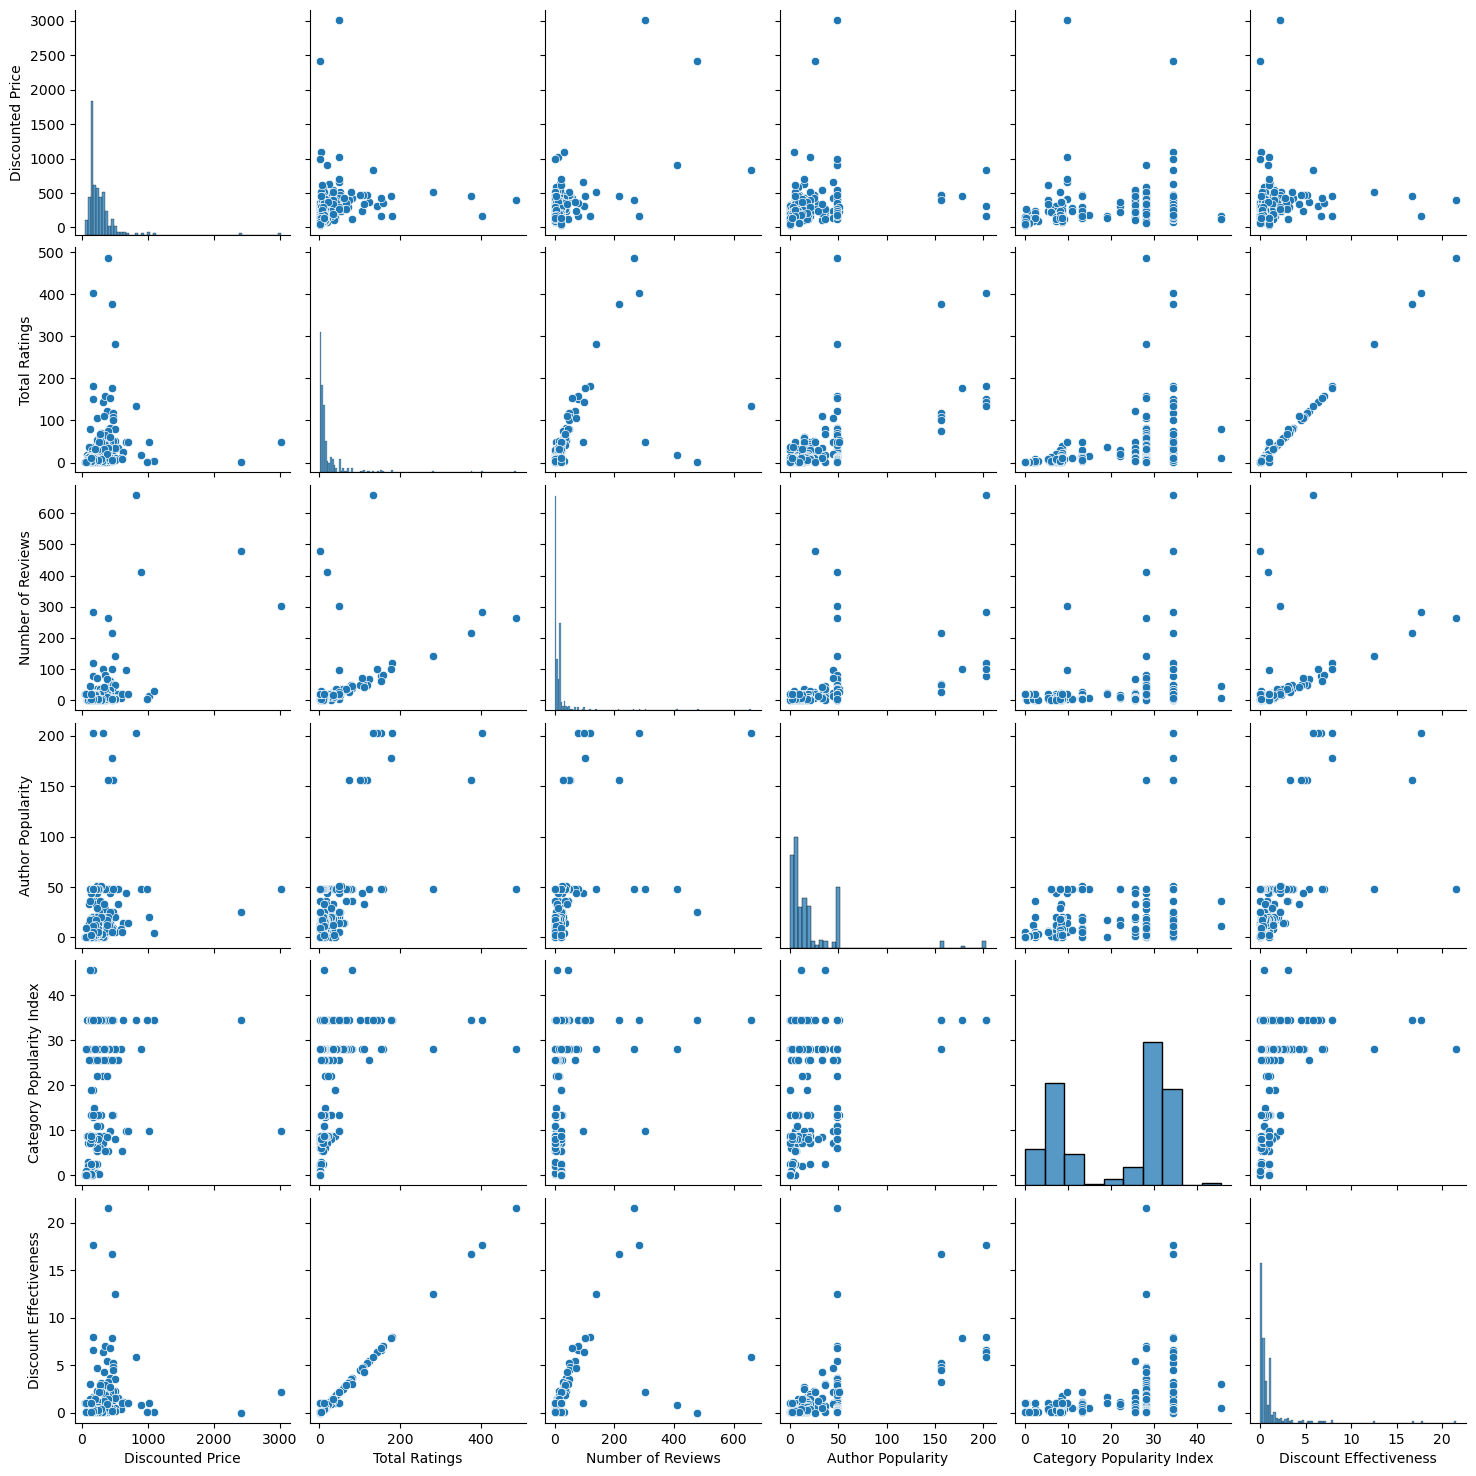

In [58]:
cols = ['Discounted Price', 'Total Ratings', 'Number of Reviews', 'Author Popularity', 'Category Popularity Index', 'Discount Effectiveness']
sns.pairplot(df[cols], size = 2.5)
plt.show()

## 📌 Conclusion

In this analysis, we explored the various facets of **BatiGhor Publication's** book sales on the Rokomari platform. By examining pricing strategies, author metrics, ratings, and category performance, we gained valuable insights into the dynamics of book sales for this publisher. Key takeaways include:

- Effective pricing strategies can significantly impact sales.
- Author popularity and ratings play crucial roles in the success of titles.
- Certain categories outperform others, indicating potential areas for strategic focus.

---

## 🚀 Future Work

To build on the findings of this project, future work could include:

- Expanding the dataset to include other publishers for a comparative analysis.
- Incorporating additional variables such as promotional events or seasonal trends.
- Applying machine learning techniques to predict future sales patterns and identify potential bestsellers.

---